## 퍼셉트론 알고리즘 예제 - p.347

In [2]:
## p.347  퍼셉트론 예제

import numpy as np

epsilon = 0.0000001        

def step_func(t):                       # 퍼셉트론의 활성화 함수(계단함수) 정의
    if t > epsilon: 
        return 1                        # 부동소수점 반올림하기
    else: return 0

X = np.array([                          # 훈련 데이터 세트
    [0, 0, 1],                          # 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [0, 1, 1],                          # 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 0, 1],                          # 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
    [1, 1, 1]                           # 맨 끝의 1은 바이어스를 위한 입력 신호 1이다. 
])

len(X)

4

In [3]:
# 정답을 저장하는 넘파이 행렬    
y = np.array([0, 0, 0, 1])

# 가중치 W의 초기값 [b, W1, W2]
W = np.array([0, 0, 0])                 
W

array([0, 0, 0])

In [4]:
def perceptron_fit(X, Y, epochs=10):    # 퍼셉트론 학습 알고리즘 구현
    global W
    eta = 0.2                           # 학습률

    for t in range(epochs):
        print("epoch=", t, "======================")
        for i in range(len(X)):                         # 샘플 수(4개)
            predict = step_func(np.dot(X[i], W))

            # 오차 계산 (오차 = 예측값 - 실제값)
            error = Y[i] - predict

            # 경사하강법: 가중치 업데이트 (error * X[i]: 미분값)
            W = W + eta * error * X[i]

            print("현재 처리 입력=",X[i],"정답=",Y[i],"출력=",predict,"변경된 가중치=", W)
        
        print("================================")

# 예측
def perceptron_predict(X, Y):
    global W
    for x in X:
         print(x[0], x[1], "->", step_func(np.dot(x, W)))

perceptron_fit(X, y, 6)
perceptron_predict(X, y)

epoch= 0 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.2 0.2 0.2]
epoch= 1 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.4 0.2 0. ]
epoch= 2 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0.4 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.4  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
epoch= 3 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.2 -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.4 -0.2]
epoch=

### 퍼셉트론을 sklearn의 Perceptron class로 학습하기

In [5]:
## p.349
from sklearn.linear_model import Perceptron
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [6]:
# 퍼셉트론 모델 정의: 2진 분류
clf = Perceptron()

# 모델 학습 -> 내부적으로 W, b등 Weight를 학습으로 찾았음
clf.fit(X, y)

Perceptron()

In [7]:
# W (Weight)
clf.coef_

array([[2., 2.]])

In [8]:
# bias
clf.intercept_

array([-2.])

In [9]:
# 모델 평가
accuracy = clf.score(X, y)
accuracy

1.0

In [10]:
# 예측
clf.predict(X)

array([0, 0, 0, 1])

In [11]:
X, y

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([0, 0, 0, 1]))

In [12]:
clf.predict([[1, 0]])

array([0])

#### OR Gate

In [13]:
### sklearn으로 퍼셉트론 실습 (p.350)
from sklearn.linear_model import Perceptron
import numpy as np

# 학습예제와 정답 레이블
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# OR
y = np.array([0, 1, 1, 1])

# 퍼셉트론 모델 정의: 2진분류
clf = Perceptron(tol =1e-3, random_state = 0)

# 모델 학습
clf.fit(X, y)
clf.predict(X)

array([0, 1, 1, 1])

In [14]:
# 정확도
clf.score(X, y)

1.0

In [15]:
# 학습된 parameter(Weight)
clf.coef_, clf.intercept_

(array([[2., 2.]]), array([-1.]))

### 03 퍼셉트론의 한계성 (XOR)

In [16]:
### sklearn으로 퍼셉트론 실습 (p.349)
from sklearn.linear_model import Perceptron
import numpy as np

# 학습예제와 정답 레이블
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR
y = np.array([0, 1, 1, 0])

In [17]:
# 퍼셉트론 모델 정의: 2진분류 
clf = Perceptron (tol = 1e-3, random_state = 0)

# 모델 학습
clf.fit(X, y)

# 모델 예측
clf.predict(X)

array([0, 0, 0, 0])

In [18]:
# 정확도 -> 퍼셉트론으로 XOR의 문제를 해결할 수 없음
clf.score(X, y)

0.5

## 활성화 함수 p.361

#### (1) 계단함수 (Step Function)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-5, 5, 0.1)
X.shape

(100,)

In [20]:
X > 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [21]:
(X > 0).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


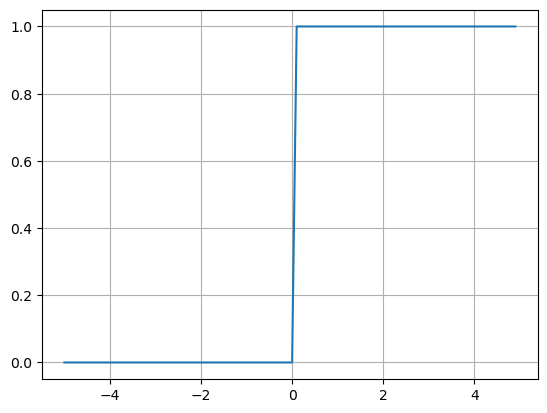

In [22]:
def step(X):                # X : numpy array
    return (X > 0).astype(int)

print(step(X))
plt.plot(X, step(X))
plt.grid()
plt.show()

#### (2) 시그모이드 함수 (Sigmoid)

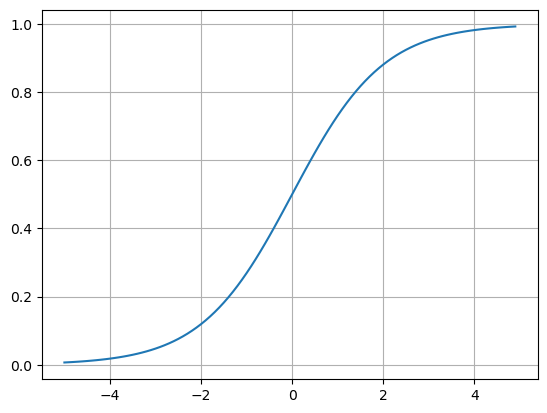

In [23]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

plt.plot(X, sigmoid(X))
plt.grid()
plt.show()

#### (3) ReLU 함수

In [24]:
def relu(X):
    return np.maximum(X, 0)

relu(X)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
       0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

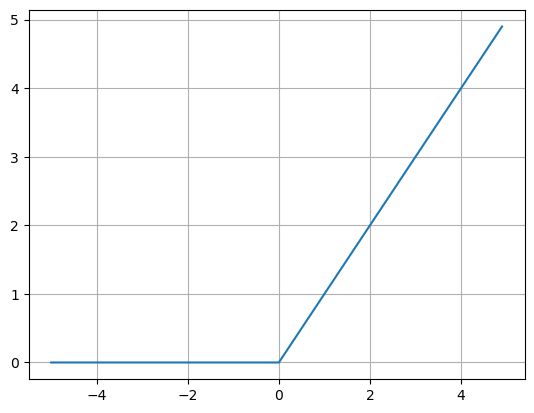

In [25]:
plt.plot(X, relu(X))
plt.grid()
plt.show()

#### (4) 하이퍼볼릭 탄젠트 함수

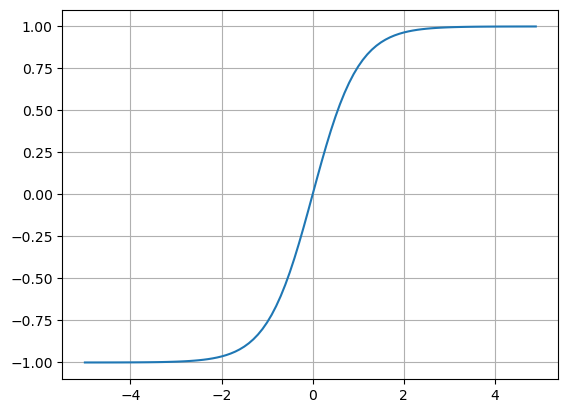

In [26]:
def tanh(X):
    return 2 / ( 1 + np.exp(-2 * X)) - 1

plt.plot(X, tanh(X))
plt.grid()
plt.show()

### 손실함수

In [27]:
# 하나의 샘플에 대한 예측값
y_pred = np.array([0.0, 0.0, 0.8, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0])  # 예측값
target = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])  # 실제값

In [28]:
# Error (오차)
pow(y_pred - target, 2)

array([0.  , 0.  , 0.04, 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ])

In [29]:
# SSE (Sum of Squared Error)
0.5 * np.sum((y_pred - target) ** 2)

np.float64(0.029999999999999992)

In [30]:
# MSE (Mean Squared Error): 샘플 하나에 대한 평균이므로 SSE와 동일함
np.mean((y_pred - target) ** 2)

np.float64(0.005999999999999998)

In [31]:
# SSE를 함수로 만들기
def SSE(pred, actual):
    return 0.5 * np.sum(pred - actual)

SSE(y_pred, target)

np.float64(2.7755575615628914e-17)

## 경사하강법 (p.378)

In [32]:
w = 10  
learning_rate = 0.01  
precision = 0.00001  
max_iterations = 100

# 손실 함수를 람다식으로 정의한다. 
# loss_func = lambda x: (x-3)**2 + 10
def loss_func(w):
    return (w - 3) ** 2 + 10

# 그래디언트를 람다식으로 정의한다. 손실 함수의 1차 미분값이다. 
# gradient = lambda x: 2*x-6
def gradient(w):
    return 2 * w - 6

# 그래디언트 강하법
for i in range(max_iterations):
    w = w - learning_rate * gradient(w)
    print(i, "loss_func: (w=", round(w, 4), ")=", round(loss_func(w), 3))

print("Loss를 최소로 하는 w값 = ", w)

0 loss_func: (w= 9.86 )= 57.06
1 loss_func: (w= 9.7228 )= 55.196
2 loss_func: (w= 9.5883 )= 53.406
3 loss_func: (w= 9.4566 )= 51.687
4 loss_func: (w= 9.3274 )= 50.037
5 loss_func: (w= 9.2009 )= 48.451
6 loss_func: (w= 9.0769 )= 46.928
7 loss_func: (w= 8.9553 )= 45.466
8 loss_func: (w= 8.8362 )= 44.062
9 loss_func: (w= 8.7195 )= 42.713
10 loss_func: (w= 8.6051 )= 41.417
11 loss_func: (w= 8.493 )= 40.173
12 loss_func: (w= 8.3832 )= 38.978
13 loss_func: (w= 8.2755 )= 37.831
14 loss_func: (w= 8.17 )= 36.729
15 loss_func: (w= 8.0666 )= 35.67
16 loss_func: (w= 7.9653 )= 34.654
17 loss_func: (w= 7.8659 )= 33.677
18 loss_func: (w= 7.7686 )= 32.74
19 loss_func: (w= 7.6733 )= 31.839
20 loss_func: (w= 7.5798 )= 30.974
21 loss_func: (w= 7.4882 )= 30.144
22 loss_func: (w= 7.3984 )= 29.346
23 loss_func: (w= 7.3105 )= 28.58
24 loss_func: (w= 7.2243 )= 27.844
25 loss_func: (w= 7.1398 )= 27.138
26 loss_func: (w= 7.057 )= 26.459
27 loss_func: (w= 6.9758 )= 25.807
28 loss_func: (w= 6.8963 )= 25.181
29 lo

## 06 넘파이를 이용한 MLP 구현 (XOR) - p.385

In [33]:
## 1) 순방향 전파
import numpy as np

# 시그모이드 함수
def actf(x):
    return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치, 시그모이드 함수 출력값을 입력으로 받는다. 
def actf_deriv(out):
        return out*(1-out)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate=0.2

# 훈련 샘플과 정답
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

# 임의의 W 초기값
W1 = np.array([[0.10,0.20], [0.30,0.40]])
W2 = np.array([[0.50],[0.60]])
B1 = np.array([0.1, 0.2])
B2 = np.array([0.3])   

# 순방향 전파 계산
def predict(x):
        layer0 = x                                          # 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1                          # 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)                                   # 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2                          # 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)                                   # 활성화 함수를 적용한다. 
        return layer0, layer1, layer2

In [34]:
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2                                       # 우리는 외부에 정의된 변수를 변경해야 한다. 
    for i in range(90000):                                      # 9만번 반복한다. 
        for x, y in zip(X, T):                                  # 학습 샘플을 하나씩 꺼낸다. 
            x = np.reshape(x, (1, -1))                          # 2차원 행렬로 만든다. ①
            y = np.reshape(y, (1, -1))                          # 2차원 행렬로 만든다. 

            layer0, layer1, layer2 = predict(x)                 # 순방향 계산
            layer2_error = layer2-y                             # 오차 계산
            layer2_delta = layer2_error*actf_deriv(layer2)      # 출력층의 델타 계산 
            layer1_error = np.dot(layer2_delta, W2.T)           # 은닉층의 오차 계산 ②
            layer1_delta = layer1_error*actf_deriv(layer1)      # 은닉층의 델타 계산 ③
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta) # ④
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta) # 
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)   # ⑤
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)   #

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))                              # 하나의 샘플을 꺼내서 2차원 행렬로 만든다. 
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)                                     # 출력층의 값을 출력해본다. 

In [35]:
fit()

In [36]:
test()

[[0 0]] [0] [[0.00814407]]
[[0 1]] [1] [[0.99154105]]
[[1 0]] [1] [[0.99152258]]
[[1 1]] [0] [[0.01038517]]


## 08 구글의 텐서플로 - p.403

In [37]:
# !pip install tensorflow

In [38]:
## 구글의 텐서플로
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# import tensorflow as tf
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])

# 지도학습 / 2진 분류 (binary classification)
y = np.array([[0],[1],[1],[0]])

In [39]:
# 딥러닝 모델 설계
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# 모델의 구조
model.summary()


c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model.compile: loss함수 정의, 
# 옵티마이저(경사하강법의 종류 - 경사하강법의 업그레이드 버전) 지정: sgd(stochastic gradient descent)
# 기본 초기값 및 learning rate 적용
# model.compile(loss='mse', optimizer='sgd')    

model.compile(loss='mse', 
              optimizer=optimizers.SGD(learning_rate=0.1),    # 학습률 조정
              metrics=['accuracy']
)


# 모델 학습 (epochs: 몇 번 학습할지)
history = model.fit(X, y, batch_size=1, epochs=1000)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5000 - loss: 0.3046     
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.2998
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.2953
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.2910
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.2871
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.2837    
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 0.2805
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.2776
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.2750
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.2728    
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 0.2709    
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms

<Axes: >

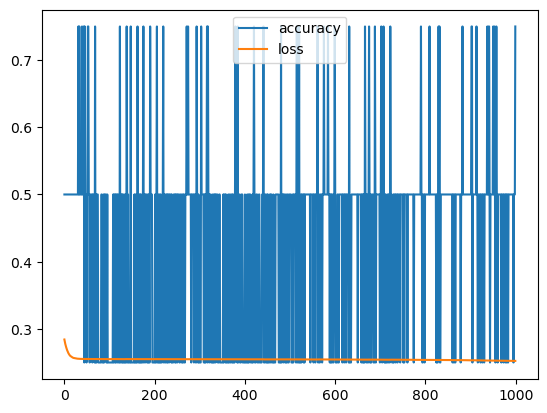

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()                              

### LAB: MLP를 사용한 MNIST 숫자 인식

In [ ]:
import tensorflow as tf

batch_size = 128    # 가중치를 변경하기 전에 처리하는 샘플의 개수
num_classes = 10    # 출력 클래스의 개수
epochs = 20         # 에포크의 개수

# 데이터를 학습 데이터와 테스트 데이터로 나눈다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 입력 이미지를 2차원에서 1차원 벡터로 변경한다. 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다. 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다. 
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다.

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 신경망의 모델을 구축한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='sigmoid'))

model.summary()

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
# sgd = tf.keras.optimizers.SGD(lr=0.1)

# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다. 
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

# 학습을 수행한다. 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs)

# 학습을 평가한다. 
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2211 - loss: 0.0906
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3863 - loss: 0.0840
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5095 - loss: 0.0781
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6121 - loss: 0.0719
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6752 - loss: 0.0659
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7199 - loss: 0.0606
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7508 - loss: 0.0559
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7722 - loss: 0.0521
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7887 - loss: 0.0488
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8016 - loss: 0.0461
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8115 - loss: 0.0438
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

In [ ]:
import pandas as pd

df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss
0,0.221133,0.090612
1,0.386317,0.083969
2,0.509533,0.078131
3,0.612067,0.071863
4,0.675200,0.065909
5,0.719900,0.060558
6,0.750750,0.055949
7,0.772200,0.052077
8,0.788683,0.048840
9,0.801600,0.046129


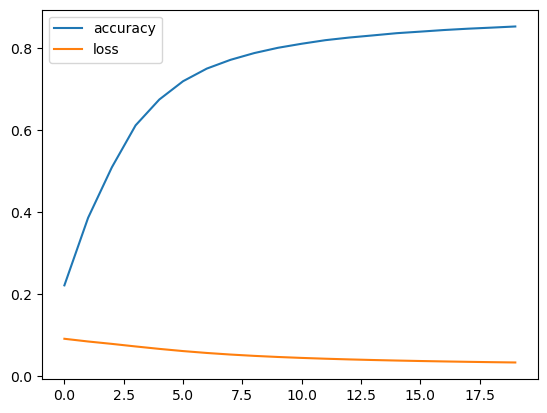

In [ ]:
df_history['accuracy'].plot()
df_history['loss'].plot()
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,052 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#### 프로그램 구조 살펴보기

In [ ]:
import tensorflow as tf

# 필요한 변수 정의 
batch_size = 125

# 학습 횟수 지정 (하이퍼 파라미터)
epochs = 20

# 최종 출력 클래스의 수(0, 1, 2, 3 .... 9)
num_classes = 10

# 예제 데이터 불러오기 (텐서플로 제공)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

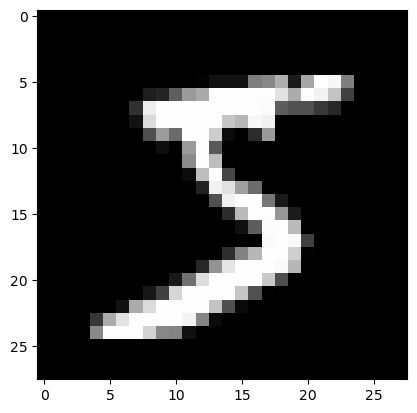

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# 일부 데이터 시각화
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:
# 실제 크기
Image.fromarray(X_train[0])

In [ ]:
## 정답
y_train[0]

np.uint8(5)

In [ ]:
# 딥러닝 구조 설계: MLT(Multi Layer Perceptron) -> 입력데이터를 한 줄로 만들어야함

# (60000, 28, 28) -> (60000, 784)
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 784))

In [ ]:
# 0 ~ 255 정수
# np.uint8: Unsigned Integer 8bit (0 ~ 255까지 정수만 수용가능한 데이터)
X_train[0].min(), X_train[0].max()

(np.uint8(0), np.uint8(255))

In [ ]:
# y 데이터 One Hot Encoding (다중 분류문제 - Multiclass classification)
y_train.shape, y_train

((60000,), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [ ]:
# 10개 class로 One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_train.shape, y_train

((60000, 10),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

In [ ]:
y_train[0], y_train[1], y_train[2]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

In [ ]:
# y_test도 동일하게 One Hot Encoding해 주어야 함
y_test.shape, y_test

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [ ]:
# 7, 2, 1, ... 이 행 별로 나타넴 -> One Hot Encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_test.shape, y_test

((10000, 10),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
# 각 행마다 최대값을 갖는 인덱스 값(axis = 0: 행 방향, axis = 1: 열 방향)
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

#### 신경망 모델 구축

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.summary()

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

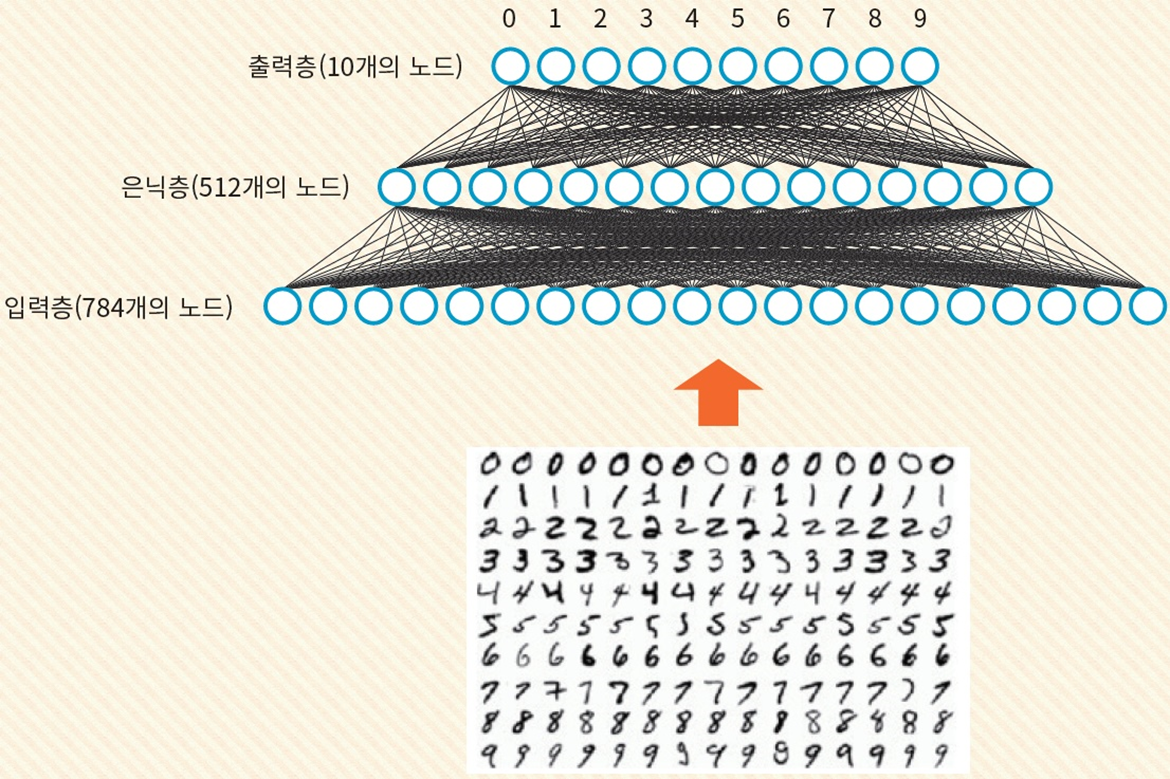

In [ ]:
# 파라미터 수 계산
print(784 * 512 + 512) 
print((784 + 1) * 512)

print(512 * 10 + 10)
print((512 + 1) * 10)

401920
401920
5130
5130


**모델 컴파일**
* Loss 함수 정의: 
    * 회귀(regression): mean_squared_error (mse) 
    * 이진분류: binary_crossentropy
    * 다중분류: categorical_crssentropy

* optimizer 지정:
    * sgd: 확률적 경사하강법 (Stochastic Gradient Descent)
    * momentum: 모멘텀 (경사하강법의 종류)
    ...
    * adam: 최근 가장 많이 사용되는 경사하강법

* metrics 설정 (평가지표)
    * 분류일 때: ['accuracy']
    * 회귀일 때: ['loss'] (생략 가능: default)

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

**학습 수행**
* history 변수에 model.fit()을 할당 -> 학습결과를 모니터 가능
* batch_size: 한꺼번에 학습할 데이터의 수 (메모리 고려)
* epochs: 학습 횟수

In [ ]:
# 기존의 28x28 이미지를 784개의 픽셀을 가진 1차원 배열로 펼치기
X_train_reshaped = X_train.reshape(-1, 784)

# 이제 reshape된 데이터를 모델에 넣고 학습
history = model.fit(X_train_reshaped, y_train,
                    batch_size=128,
                    epochs=epochs)

NameError: name 'X_train' is not defined

**모델 평가**

In [ ]:
# 총 10000개의 test 데이터로 평가
score = model.evaluate(X_test, y_test)
[loss, accuracy]
score

NameError: name 'model' is not defined

In [ ]:
print("테스트 데이터의 Loss = ", score[0])
print("테스트 데이터의 정확도 = ", score[1])

NameError: name 'score' is not defined

**학습 과정 시각화**

In [ ]:
# 딕셔너리
history.history

NameError: name 'history' is not defined

In [ ]:
import pandas as pd

df_history = pd.DataFrame(history.history)
df_history

NameError: name 'history' is not defined

In [ ]:
df_history.plot()

NameError: name 'df_history' is not defined